https://github.com/Copernicus73/Tarea2_IntroCienciaDatos

In [1]:
# Para los gráficos.
import matplotlib.pyplot as plt

# Para arrays solamente.
import numpy as np

# Para utilizar esta librería puede usar las funciones de la siguiente forma.
import AnalisisEstadistico as anes 

lista = [5.1, 9.53, 4.85, 9.53, 4.26, 6.32, 1.66, 1.66, 2.39, 3.86]
lista2 = ["hola", "mundo", "hola", "que", "so"]

print("Promedio: ", anes.medArit(lista))
print("Mediana: ", anes.mediana(lista))
print("Moda", anes.moda(lista))
print("Rango", anes.rango(lista))
print("Varianza", anes.varia(lista))
print("Desviación Estándar", anes.STD(lista))
print("Percentil", anes.perc(lista))
print("Rango Intercuartílico", anes.IQR(lista))
print("Desviación Absoluta Media", anes.MAD(lista))

print("Moda", anes.moda(lista2))

Promedio:  4.915999999999999
Mediana:  4.555
Moda ('1.66, 9.53', '2')
Rango 7.869999999999999
Varianza 7.371663999999998
Desviación Estándar 2.715080845941792
Percentil [1.66, 1.66, 1.66, 1.66, 1.66, 1.66, 1.66, 1.66, 1.66, 1.66, 1.66, 1.66, 1.66, 1.66, 1.66, 1.66, 1.66, 1.66, 1.66, 2.39, 2.39, 2.39, 2.39, 2.39, 2.39, 2.39, 2.39, 2.39, 2.39, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 4.26, 4.26, 4.26, 4.26, 4.26, 4.26, 4.26, 4.26, 4.26, 4.26, 4.85, 4.85, 4.85, 4.85, 4.85, 4.85, 4.85, 4.85, 4.85, 4.85, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 6.32, 6.32, 6.32, 6.32, 6.32, 6.32, 6.32, 6.32, 6.32, 6.32, 9.53, 9.53, 9.53, 9.53, 9.53, 9.53, 9.53, 9.53, 9.53, 9.53, 9.53, 9.53, 9.53, 9.53, 9.53, 9.53, 9.53, 9.53, 9.53, 9.53]
Rango Intercuartílico 3.93
Desviación Absoluta Media 2.1632
Moda ('hola', '2')


## Parte I: catálogo de estrellas brillantes

El archivo "bsc_sel.dat" (proveniente del “Bright Star Catalog”) contiene una tabla con información para<br>
aproximadamente las 9100 estrellas más brillantes del cielo. Sus columnas son:

* HR: un identificador correlativo en el catálogo.

* HD: identificador en el catálogo Henry Draper.

* Vmag: magnitud visual (en el filtro V).

* B-V: color (la diferencia de magnitudes en las bandas fotompétricas B y V).

* SpType: tipo espectral.

Debe considerar que algunos valores, en algunas columnas, pueden ser NaN, por lo que podría tener que hacer<br>
verificaciones para evitar esos valores en algunos casos.

#### Pregunta 1  (4 puntos)

* Encontrar cuales son las 10 categorías más frecuentes de los tipos espectrales.

* Hacer un gráfico de barras para estas 10 categorías, con los ejes y barras correctamente etiquetados.

* Calcular la moda de los tipos espectrales (usando su librería) ¿coincide esto con lo que puede leer del
gráfico de barras?

* ¿Cuáles son los tres tipos espectrales más comunes de la muestra?

In [2]:
# Función que se utilizará para leer los arhivos.

def leerColumna(numColumna):
	"""
	Lee una columna especificada de un archivo de texto.

	Parámetros:
		numColumna (int): Número de la columna a leer (empezando desde 1).

	Retorna:
		list: Lista con los datos de la columna especificada, excluyendo el encabezado y los NaNs.
	"""

	# Aquí se almacenaran todos los datos hallados en la lista
	datos = []

	archivo = open("bsc_sel.dat", "r")

	# Omitir el encabezado.
	next(archivo)

	# Leer el resto de las líneas del archivo.
	for line in archivo:
		# Dividir la línea en columnas, separando por espacios.
		columnas = line.split()

		# Verificar que la columna solicitada existe en la línea.
		if len(columnas) >= numColumna:
			# Obtener el valor de la columna deseada.
			valor = columnas[numColumna - 1]

			# Omitir valores NaN.
			if valor.lower() != "nan":
				datos.append(valor)
				
	archivo.close()

	return datos

In [3]:
def tiposEspFrecuentes(datos, n = 10):
	"""
	Obtiene los n tipos espectrales más frecuentes de una lista de datos
	y guarda las claves y valores en listas separadas.
	
	Parámetros:
		datos (list): Lista de tipos espectrales a analizar.
		n (int): Número de tipos espectrales más frecuentes a obtener (por defecto 10).
		
	Retorna:
		tuple: Una tupla que contiene dos listas:
			- Una lista con los n tipos espectrales más frecuentes (claves).
			- Una lista con las frecuencias correspondientes (valores).
	"""
	# Crear un diccionario para contar las frecuencias de cada tipo espectral.
	frecuencias = {}
	
	# Contar la frecuencia de cada tipo espectral.
	for tipo in datos:
		if tipo in frecuencias:
			frecuencias[tipo] += 1
		else:
			frecuencias[tipo] = 1
	
	# Ordenar los tipos espectrales por su frecuencia en orden descendente.
	tiposFrecuentes = sorted(frecuencias.items(), key = lambda item: item[1], reverse=True)
	
	# Separar tipos y valores en listas
	tipos = [tipo for tipo, _ in tiposFrecuentes[:n]]
	valores = [frecuencia for _, frecuencia in tiposFrecuentes[:n]]
	
	return tipos, valores

# Se imprimen los 10 tipos más frecuentes.
print("Los 10 tipos espectrales más frecuentes son:\n")

tipos, valores = tiposEspFrecuentes(leerColumna(5))
i = 0

# Ciclo para imprimir los tipos de forma ordenada.
while True:
	print(f"{tipos[i]}: {valores[i]}")
	i += 1

	# El ciclo se detiene cuando se acaban los datos.
	if i == len(tipos):
		break

Los 10 tipos espectrales más frecuentes son:

K0III: 288
K1III: 222
G8III: 209
K2III: 194
A0V: 176
K3III: 172
K0: 165
A1V: 157
A2V: 153
K5III: 139


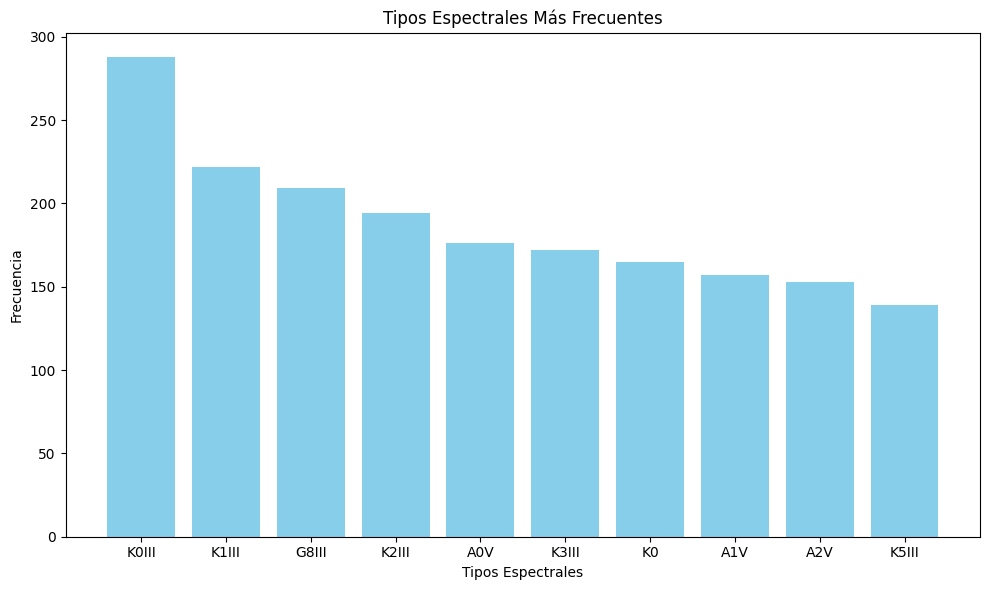

In [4]:
# Crear la figura y los ejes.
fig, ax = plt.subplots(figsize = (10, 6))

# Crear el gráfico de barras.
ax.bar(tipos, valores, color = "skyblue")

# Configurar etiquetas y título
ax.set_xlabel("Tipos Espectrales")
ax.set_ylabel("Frecuencia")
ax.set_title("Tipos Espectrales Más Frecuentes")

# Ajustar el diseño para que los elementos no se superpongan.
fig.tight_layout()

# Mostrar el gráfico.
plt.show()

In [5]:
# Se imprime la moda.
valorModa, frecuenciaMax = anes.moda(leerColumna(5))
print(f"El tipo espectral más frecuente es: {valorModa}")
# Claramente el resultado concuerda con el gráfico.

El tipo espectral más frecuente es: K0III


In [6]:
# Se imprimen los 3 tipos más frecuentes.
print(f"En orden descendente, los 3 tipos espectrales más frecuentes son: {tipos[0]}, {tipos[1]} y {tipos[2]}")

En orden descendente, los 3 tipos espectrales más frecuentes son: K0III, K1III y G8III


#### Pregunta 2 (1 punto)

Hacer un gráfico de torta de los 10 tipos espectrales más frecuentes.


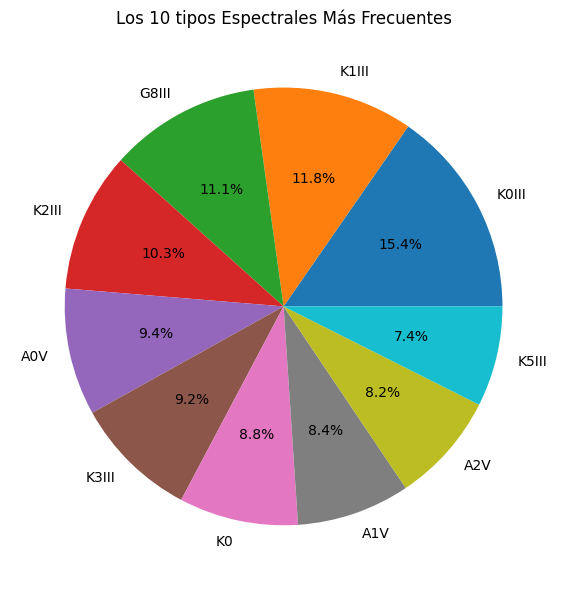

In [7]:
# Crear la figura y los ejes.
fig, ax = plt.subplots(figsize=(12, 6))

# Crear el gráfico de pastel.
ax.pie(valores, labels = tipos, autopct = "%1.1f%%")

# Configurar el título.
ax.set_title("Los 10 tipos Espectrales Más Frecuentes")

# Ajustar el diseño para que los elementos no se superpongan.
fig.tight_layout()

# Mostrar el gráfico.
plt.show()

#### Pregunta 3 (4 puntos)
Seleccionar todas las estrellas de tipo espectral K0III y hacer un histograma de sus colores B-V:

* Estimar el número de bines a usar con la regla de Freeman & Diaconis. Usar color gris para el
histograma.

* Calcule el promedio de B-V y márquelo encima del histograma con una linea vertical sólida negra.<br>
Coloque una etiqueta que indique “Promedio = x.xxx”, es decir, usando tres decimales (para hacer esto<br>
debe utilizar formateo de strings y no escribir el valor explícitamente en el código).

* Calcule la mediana de B-V y márquela encima del histograma con una linea vertical a trazos roja.<br>
Coloque una etiqueta que indique “Mediana = x.xxx”, es decir, usando tres decimales.

* Calcule la desviación estándar de B-V. Grafique un par de líneas punteadas verdes en posiciones que<br>
señalen el intervalo promedio-STD : promedio+STD. Indique el valor de la desviación estándar con una<br>
etiqueta (con el mismo formato que las cantidades anteriores).

* Calule los cuartiles Q1 y Q3 y márquelos usando lineas azules punteadas. Agregue etiquetas para indicar<br>
sus valores.

In [8]:
# Función que se utilizará para leer los arhivos, esta vez con NaN incluidos.

def leerColumnaNaN(numColumna):
	"""
	Lee una columna especificada de un archivo de texto.

	Parámetros:
		numColumna (int): Número de la columna a leer (empezando desde 1).

	Retorna:
		list: Lista con los datos de la columna especificada, excluyendo el encabezado y los NaNs.
	"""

	# Aquí se almacenaran todos los datos hallados en la lista
	datos = []

	archivo = open("bsc_sel.dat", "r")

	# Leer la primera línea para omitir el encabezado.
	next(archivo)

	# Leer el resto de las líneas del archivo.
	for line in archivo:
		# Dividir la línea en columnas, separando por espacios.
		columnas = line.split()

		# Verificar que la columna solicitada existe en la línea.
		if len(columnas) >= numColumna:
			# Obtener el valor de la columna deseada.
			valor = columnas[numColumna - 1]
			datos.append(valor)

			# No se omiten los Nan, esta vez se necesitan.
				
	archivo.close()

	return datos

In [9]:
# Usamos zip para combinar las dos listas (colores y tipos)
colorTipo = [color for color, tipo in zip(leerColumnaNaN(4), leerColumnaNaN(5)) if tipo == "K0III"]

# Ahora limpiamos.
colorRealK0III = []
for color in colorTipo:
	if color != "nan":
		colorRealK0III.append(float(color))

In [10]:
def freeDiac(datos):

	# Se calcula el IQR para los datos.
	datosIQR = anes.IQR(datos)

	# Cntidad de datos
	n = len(datos)

	# Nota: Que yo sepa es Freedman, no Freeman.
	# Aplicar la fórmula de Freedman-Diaconis
	u =  (2 * datosIQR) / (n ** (1/3))
	tamanoBins = int(anes.rango(colorRealK0III)/u)

	return tamanoBins

tamanoBins = freeDiac(colorRealK0III)

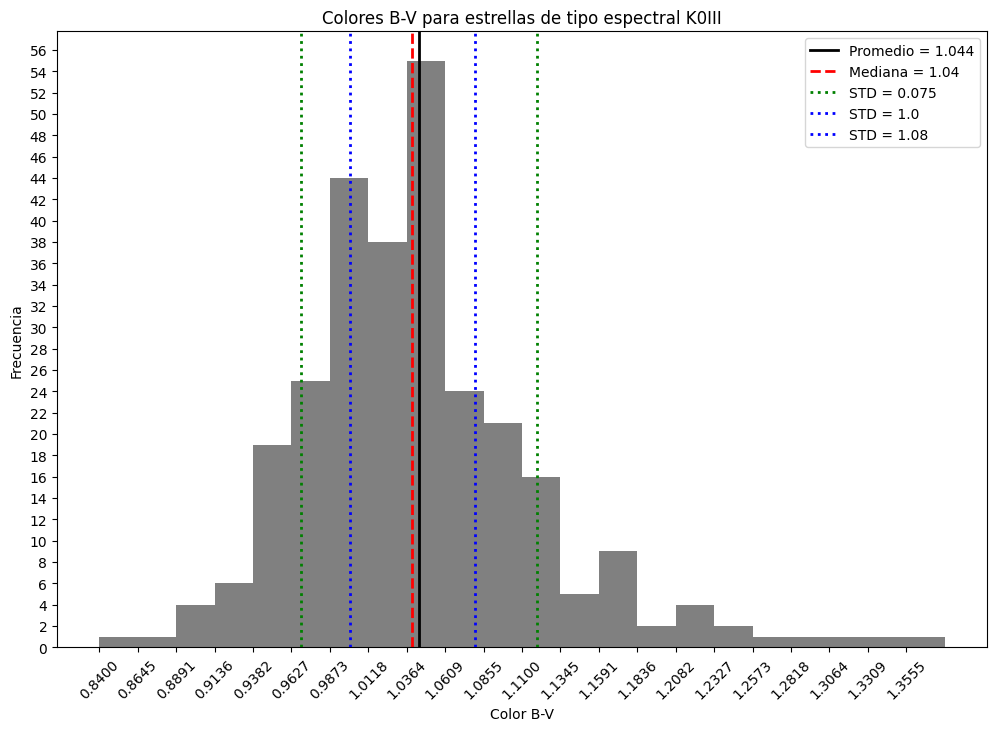

In [11]:
"""
Nota: Aquí utilicé arrays en la línea 10,
esta es la primera vez en ser utilizado.
Solo por sí acaso aviso.
"""

# Crear la figura y los ejes.
fig, ax = plt.subplots(figsize = (12, 8))

# Generar el histograma con color gris.
ax.hist(colorRealK0III, bins = tamanoBins, color = "gray")

# Ajustar los ticks en el eje X.
xticks = np.arange(min(colorRealK0III), max(colorRealK0III), 0.1 / 22 + 0.02)
ax.set_xticks(xticks)

# Rota los ticks del eje X.
plt.xticks(rotation = 45)

# Ajustar el rango del eje Y.
ax.set_yticks(range(0, 58, 2))

# Añadir títulos y etiquetas.
ax.set_title("Colores B-V para estrellas de tipo espectral K0III")
ax.set_xlabel("Color B-V")
ax.set_ylabel("Frecuencia")

# Línea para el promedio.
promedio = anes.medArit(colorRealK0III)
ax.axvline(promedio, color = "black", linestyle = "-", linewidth = 2, label = f"Promedio = {round(promedio, 3)}")

# Línea para la mediana.
mediana = anes.mediana(colorRealK0III)
ax.axvline(mediana, color = "red", linestyle = "--", linewidth=2, label = f"Mediana = {round(mediana, 3)}")

# Líneas para la desviacón estándar, la suma y diferencia con el promedio.
STD = anes.STD(colorRealK0III)
ax.axvline(promedio - STD, color = "green", linestyle = ":", linewidth = 2, label = f"STD = {round(STD, 3)}")
ax.axvline(promedio + STD, color = "green", linestyle = ":", linewidth = 2)

# Líneas para los cuartiles Q1 y Q2.
Q1 = anes.perc(colorRealK0III)[24]
Q2 = anes.perc(colorRealK0III)[74]
ax.axvline(Q1, color = "blue", linestyle = ":", linewidth = 2, label = f"STD = {round(Q1, 3)}")
ax.axvline(Q2, color = "blue", linestyle = ":", linewidth = 2, label = f"STD = {round(Q2, 3)}")

# Añadir la leyenda para las líneas.
ax.legend()

# Mostrar el gráfico.
plt.show()

#### Pregunta 4 (1 punto)

Haga un diagrama de caja de los colores B-V de las estrellas de tipo espectral K0III seleccionadas en la pregunta<br>
anterior. Use cruces de color verde para representar los valores atípicos (para esto puede usar la keyword<br>
“flierprops” del método “boxplot”)

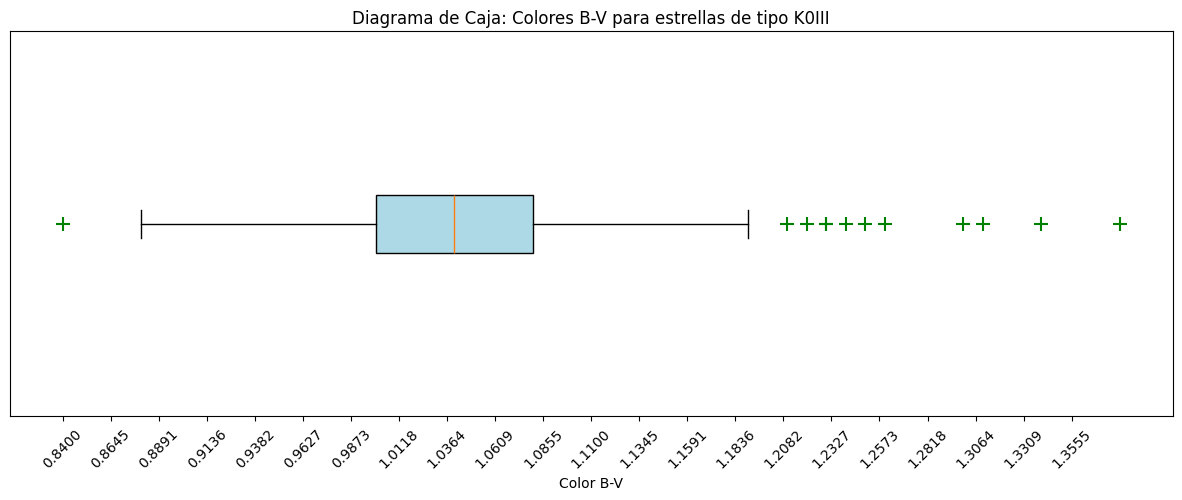

In [12]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize = (15, 5))

# Valores atípicos con cruces verdes
flierprops = dict(marker = "+", markeredgecolor = "green", markeredgewidth = 1.5, markersize = 10,)

# Crear el diagrama de caja
ax.boxplot(colorRealK0III, flierprops = flierprops, vert = False, patch_artist = True, boxprops = dict(facecolor = "lightblue"))

# Rota los ticks del eje X.
plt.xticks(rotation = 45)

# Ajustar los ticks en el eje X.
xticks = np.arange(min(colorRealK0III), max(colorRealK0III), 0.1 / 22 + 0.02)
ax.set_xticks(xticks)

# Añadir títulos y etiquetas
ax.set_title("Diagrama de Caja: Colores B-V para estrellas de tipo K0III")
ax.set_xlabel("Color B-V")
# Eliminar etiquetas en el eje Y (Considerando que no se necesitan)
ax.set_yticks([])

# Mostrar el gráfico
plt.show()

#### Pregunta 5 (3 puntos)

Haga en un solo gráfico, varios diagramas de caja para representar las distribuciones del color B-V de<br>
selecciones de estrellas correspondientes a los tipos espectrales siguientes: A0V, A1V, A2V, G8III, K0III, K3III y<br>
K5III. Ordene los diagramas de caja de izquierda a derecha siguiendo el orden de la lista anterior y agregue<br>
etiquetas en el eje horizontal del gráfico para indicar a qué tipo espectral corresponde cada diagrama de caja.<br>
Use cruces de color verde para representar los valores atípicos.

In [13]:
print("):")

):


#### Pregunta 6 (3 puntos)

Haga un gráfico igual al anterior, pero de la magnitud V de las estrellas de las selecciones (en vez de su color B-<br>
V).

In [14]:
print("):")

):


## Parte II: catálogo de estrellas del bulbo galáctico

El archivo "bulbo_galactico.dat" contiene información para aproximadamente 9500 estrellas observadas por el<br>
mapeo espectroscópico APOGEE en la región central de la Vía Láctea. Sus columnas son:

* ID: identificador en el catálogo APOGEE.

* glon: longitud galáctica.

* glat: latitud galáctica.

* vrad: velocidad radial (km/s).

* fe_h: abundancia de hierro (metalicidad) [Fe/H].

* mg_fe: abundancia de magnesio [Mg/Fe].

* o_fe: abundancia de oxigeno [O/Fe].

#### Pregunta 7 (4 puntos)

Crear un gráfico de dispersión de [Fe/H] (eje horizontal)  versus [Mg/Fe] (eje vertical):

* Usar puntos grises de un tamaño suficientemente pequeño para evitar una excesiva saturación (el gráfico<br>
quedará algo saturado igualmente por la cantidad de puntos).

* Puede usar los límites -2.0 : 0.75 y -0.2 : 0.6 para los ejes horizontal y vertical, respectivamente.

* Divida el intervalo de metalicidad en 18 partes y considere solo aquellos intervalos en los que haya más<br>
de 5 estrellas. Para cada uno de ellos, calcular el valor de la mediana de [Mg/Fe] y use los puntos así<br>
calculados para graficar una curva mediana de la distribución de los datos. Use cruces rojas para graficar<br>
los puntos que determinan esta curva.

* Del mismo modo, estime lineas que indiquen los percentiles 5% y 95% de los valores de [Mg/Fe] a lo<br>
largo de los intervalos de metalicidad. Grafíquelos usando dos pares de lineas verdes.

* Calcule el MAD de [Mg/Fe] a lo largo de los intervalos de metalicidad. Use lineas magenta para indicar<br>
las curvas de mediana – MAD y mediana + MAD

In [15]:
# Función que se utilizará para leer los arhivos.
# La pongo de nuevo para no estar cambiando el input a cada rato, simplemente coloco la ruta del archivo
def leerColumna2(numColumna):
	"""
	Lee una columna especificada de un archivo de texto.

	Parámetros:
		numColumna (int): Número de la columna a leer (empezando desde 1).

	Retorna:
		list: Lista con los datos de la columna especificada, excluyendo el encabezado y los NaNs.
	"""

	# Aquí se almacenarán todos los datos hallados en la lista.
	datos = []

	archivo = open("bulbo_galactico.dat", "r")

	# Omitir el encabezado.
	next(archivo)

	# Leer el resto de las líneas del archivo.
	for line in archivo:
		# Dividir la línea en columnas, separando por espacios.
		columnas = line.split()

		# Verificar que la columna solicitada existe en la línea.
		if len(columnas) >= numColumna:
			# Obtener el valor de la columna deseada.
			valor = columnas[numColumna - 1]

			# Omitir valores NaN.
			if valor.lower() != "nan":
				datos.append(valor)
				
	archivo.close()

	return datos

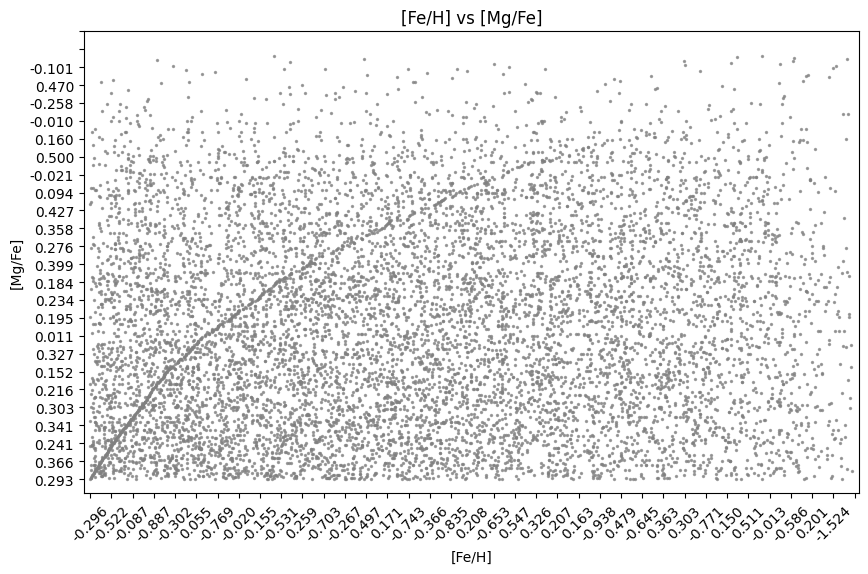

In [16]:
# Se utilizaron arrays.

# Datos para los ejes X e Y.
fe_h = leerColumna2(5)
mg_fe = leerColumna2(6)

# Crear la figura.
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el gráfico de dispersión.
ax.scatter(fe_h, mg_fe, color="gray", s=2, alpha=0.7)

# Establecer los ticks en el gráfico.
ax.set_xticks(np.arange(-200.0, 2000, 50))
ax.set_yticks(np.arange(-500.0, 1000,25))

# Establecer los límites en el gráfico.
ax.set_xlim(-15.0, 1810)
ax.set_ylim(-20.0, 625)

# Añadir títulos y etiquetas a los ejes.
ax.set_title("[Fe/H] vs [Mg/Fe]")
ax.set_xlabel("[Fe/H]")
ax.set_ylabel("[Mg/Fe]")

# Rota los ticks del eje X.
plt.xticks(rotation=45)

# Mostrar el gráfico.
plt.show()

#### Pregunta 8 (4 puntos)

En esta pregunta usted deberá elaborar dos mapas que muestren como las estrellas del bulbo de diferente<br>
metalicidad se mueven en el plano del cielo (en coordenadas galácticas). Para ello deberá hacer lo siguiente:

•Usando la metalicidad [Fe/H], separe dos grupos de estrellas, aquellas con valores menores (pobres en<br>
metales) y mayores (ricas en metales) que cero.

•Hacer dos gráficos, uno para cada selección, en los que grafique y discretize la distribución de estrellas<br>
en longitud vs latitud galáctica. Use como límites el intervalo -10 : 10 en ambos ejes. Al hacer los bines<br>
bidimensionales considere entre 13 y 16 bines en cada dirección. Elija la cantidad de bines que le<br>
parezca que ofrece la mejor visualización de la distribución de los datos.

•Usando esta discretización 2D de los datos, calcular en cada bin la desviación estándar de la velocidad<br>
radial. Incluir una barra de colores apropiadamente etiquetada.

•Para poder comparar ambos gráficos (mapas cinemáticos) definir sus rangos dinámicos (esto es, los<br>
valores mínimo y máximo de la barra de colores) de tal manera que sean los mismos. El valor inferior es<br>
0 km/s (la mínima dispersión posible). El máximo valor estímelo al observar el rango de los valores en<br>
los mapas como definidos automáticamente por matplotlib antes de definirlos a mano.

In [17]:
print("):")

):


#### Pregunta 9 (2 puntos)

Haga un gráfico de dispersión de la abundancia de magnesio versus la de oxígeno. Ambas cantidades parecen<br>
aumentar juntas. En efecto, ambos elementos químicos son producidos en el mismo sitio astrofísico (explosión<br>
como supernova de estrellas masivas). Calcule el coeficiente de correlación de estas dos variables ¿confirma su<br>
valor la presunta relación entre estas dos cantidades?

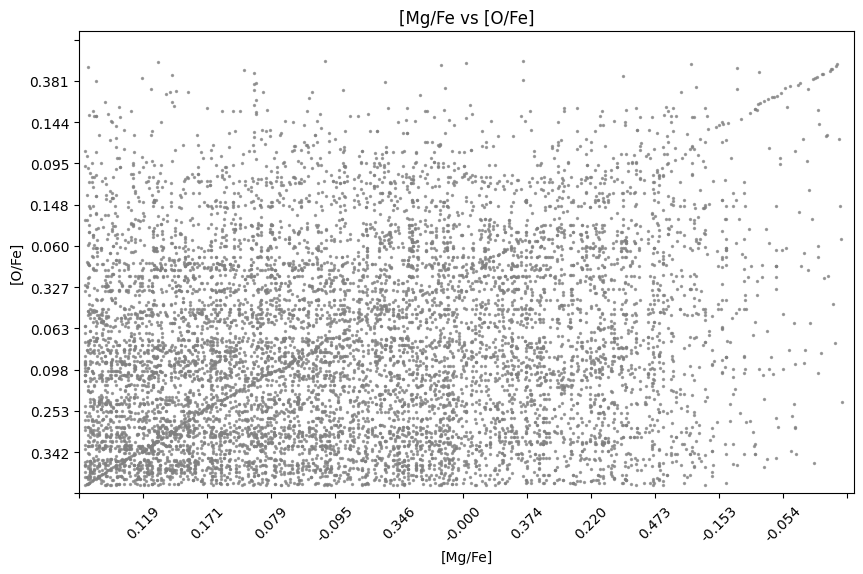

In [18]:
# Se utilizaron arrays.

# Datos para los ejes X e Y.
mg_fe = leerColumna2(6)
o_fe = leerColumna2(7)

# Crear la figura.
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de dispersión.
ax.scatter( mg_fe, o_fe, color="gray", s=2, alpha=0.7)

# Establecer los ticks en el gráfico.
ax.set_xticks(np.arange(-5.0, 600, 50))
ax.set_yticks(np.arange(-10.0, 550, 50))

# Establecer los límites en el gráfico.
ax.set_xlim(-5.0, 600)
ax.set_ylim(-10.0, 550)

# Añadir títulos y etiquetas a los ejes.
ax.set_title("[Mg/Fe vs [O/Fe]")
ax.set_xlabel("[Mg/Fe]")
ax.set_ylabel("[O/Fe]")

# Rota los ticks del eje X.
plt.xticks(rotation=45)

# Mostrar el gráfico.
plt.show()